In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from train_utils import full_report

In [2]:
train = pd.read_csv('../../data/final_data_2019.csv')
val = pd.read_csv('../../data/final_data_2020.csv')
test = pd.read_csv('../../data/final_data_2021.csv')

In [3]:
train.head()

,station_id,lat,long,forecast,gridpp,observations,year,month,day,hour
0,SN18700,59.9423,10.7200,22.148926,20.850006,20.7,2019,6,28,18
1,SN78910,64.6933,12.3295,10.692871,11.356781,11.4,2019,6,28,18
2,SN50810,60.4742,5.3418,15.672363,18.380768,15.6,2019,6,28,18
3,SN51010,60.5205,5.7243,16.461426,17.142456,17.8,2019,6,28,18
4,SN44640,58.9563,5.7278,16.282715,16.750000,16.6,2019,6,28,18


In [4]:
print(train.shape)

(308032, 10)


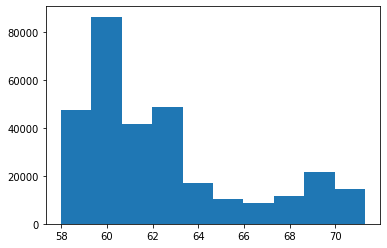

In [5]:
plt.hist(train.lat);

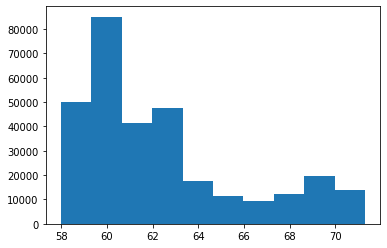

In [6]:
plt.hist(val.lat);

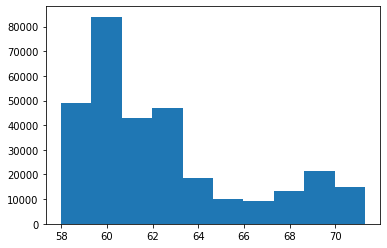

In [7]:
plt.hist(test.lat);

# Formato dos Dados

In [8]:
train.describe()[['forecast', 'gridpp', 'observations']]

,forecast,gridpp,observations
count,308032.000000,308032.000000,308032.000000
mean,4.536518,5.228229,4.878479
std,10.862447,8.019944,8.084023
min,-273.000000,-39.449997,-39.600000
25%,-0.482933,-0.010109,-0.300000
50%,4.565186,5.070435,4.900000
75%,10.395996,10.932266,10.600000
max,35.032227,33.850006,33.700000


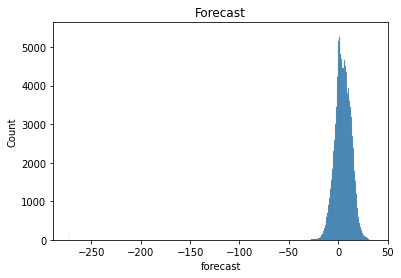

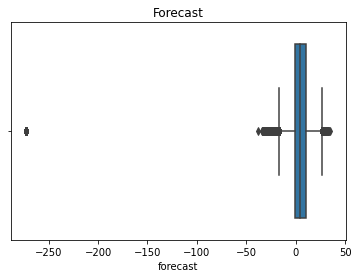

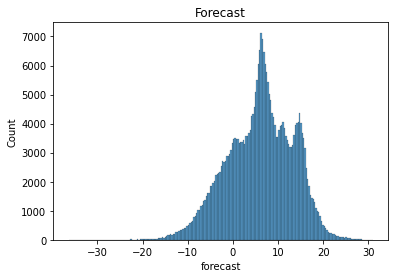

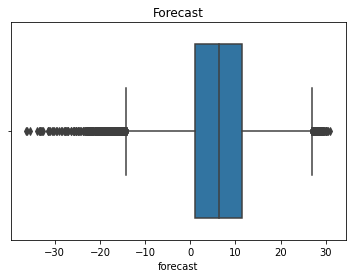

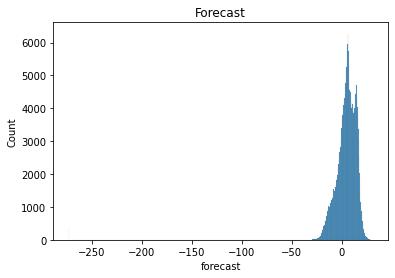

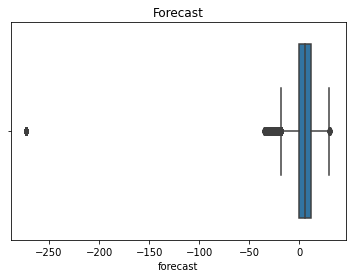

In [9]:
datasets = [train, val, test]

for item in datasets:
    sns.histplot(item.forecast)
    plt.title('Forecast')
    plt.show()

    sns.boxplot(x = item.forecast)
    plt.title('Forecast')
    plt.show()

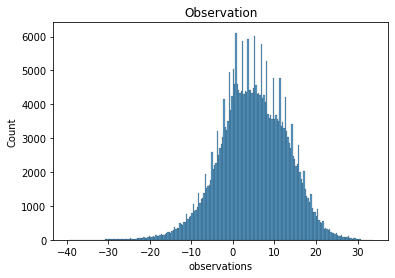

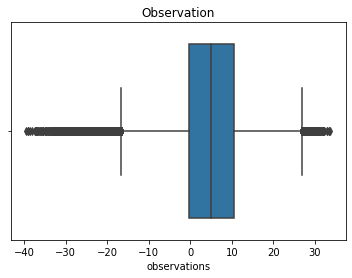

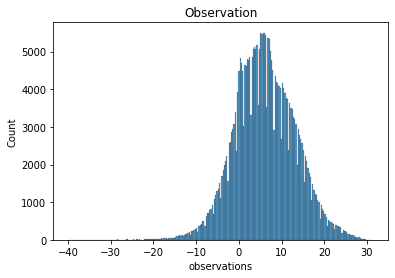

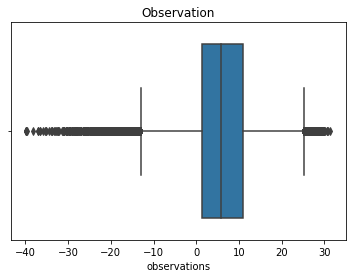

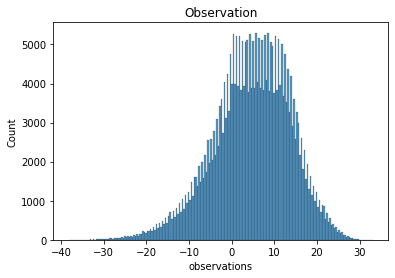

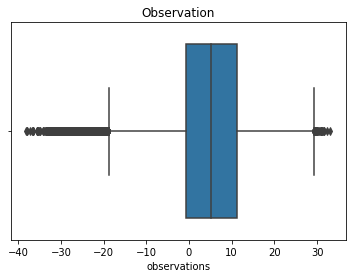

In [10]:
for item in datasets:
    sns.histplot(item.observations)
    plt.title('Observation')
    plt.show()

    sns.boxplot(x = item.observations)
    plt.title('Observation')
    plt.show()

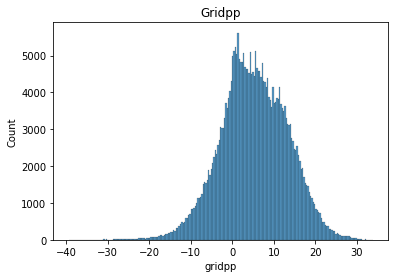

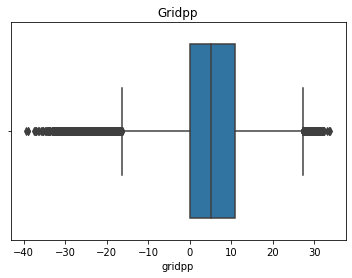

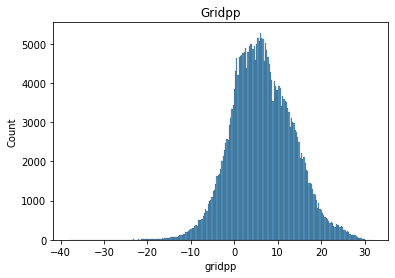

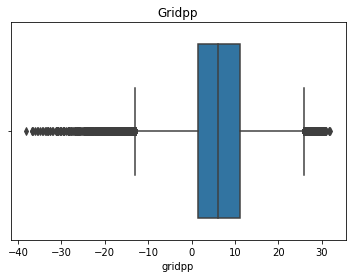

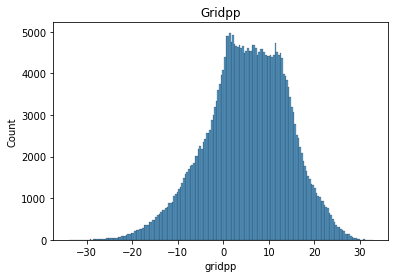

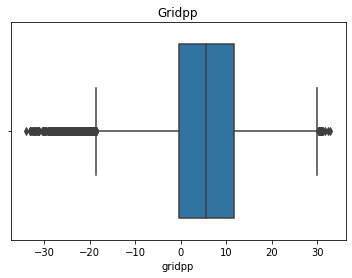

In [11]:
for item in datasets:
    sns.histplot(item.gridpp)
    plt.title('Gridpp')
    plt.show()

    sns.boxplot(x = item.gridpp)
    plt.title('Gridpp')
    plt.show()

In [12]:
# print(df.shape)
# df.drop(df[df.observation > 30].index, inplace=True)
# df.drop(df[df.observation < -20].index, inplace=True)
# print(df.shape)

<strong>Parece não haver problemas aqui. Talvez seja interessante posteriormente analisar as diferenças das 2 colunas, pois isso pode indicar algum erro nos dados</strong>

In [13]:
for item in datasets:
    item.drop(item[item.forecast < -260].index, inplace=True)

In [14]:
for item in datasets:
    print(item.shape)

(307810, 10)
(308107, 10)
(310159, 10)


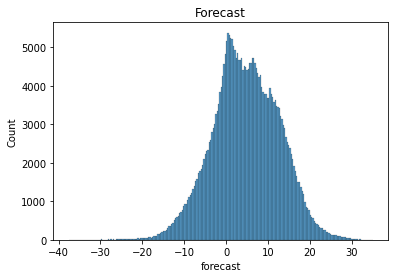

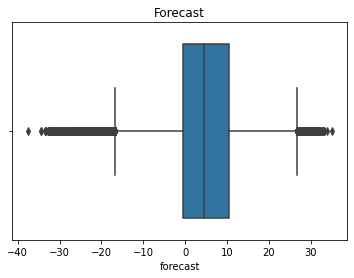

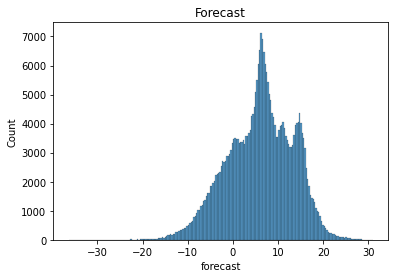

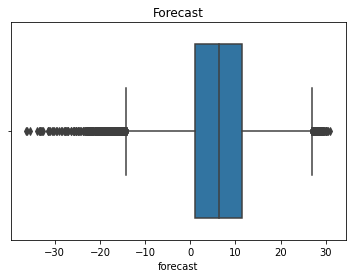

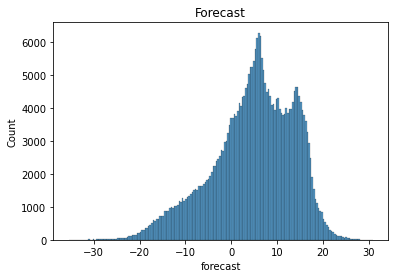

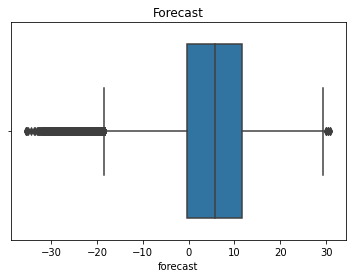

In [15]:
for item in datasets:
    sns.histplot(item.forecast)
    plt.title('Forecast')
    plt.show()

    sns.boxplot(x = item.forecast)
    plt.title('Forecast')
    plt.show()

### Vendo erro de medição do gridpp e cortando outliers
Definido outlier entradas com diferença entre observation e gridpp > 5

In [16]:
train['gridpp_error'] = np.sqrt((train['observations'] - train['gridpp'])**2)
train.head()

,station_id,lat,long,forecast,gridpp,observations,year,month,day,hour,gridpp_error
0,SN18700,59.9423,10.7200,22.148926,20.850006,20.7,2019,6,28,18,0.150006
1,SN78910,64.6933,12.3295,10.692871,11.356781,11.4,2019,6,28,18,0.043219
2,SN50810,60.4742,5.3418,15.672363,18.380768,15.6,2019,6,28,18,2.780768
3,SN51010,60.5205,5.7243,16.461426,17.142456,17.8,2019,6,28,18,0.657544
4,SN44640,58.9563,5.7278,16.282715,16.750000,16.6,2019,6,28,18,0.150000


In [17]:
train[train.gridpp_error > 5]

,station_id,lat,long,forecast,gridpp,observations,year,month,day,hour,gridpp_error
33,SN50850,60.3570,5.4515,14.879395,18.162292,24.3,2019,6,28,18,6.137708
845,SN39040,58.2000,8.0767,15.283203,15.878662,10.4,2019,6,28,0,5.478662
864,SN26996,59.6473,10.1052,12.253418,13.691803,4.7,2019,6,28,0,8.991803
899,SN50850,60.3570,5.4515,13.398926,16.047211,22.5,2019,6,27,18,6.452789
911,SN40250,59.1972,7.5273,17.608887,23.547791,18.1,2019,6,27,18,5.447791
...,...,...,...,...,...,...,...,...,...,...,...
307326,SN63940,62.2767,9.5877,-9.177002,-7.644165,-15.3,2019,12,13,6,7.655835
307342,SN9160,62.1282,9.9947,-6.249756,-7.312317,-14.0,2019,12,13,6,6.687683
307441,SN70960,64.3333,12.3410,-1.467041,-0.020355,-5.3,2019,12,13,0,5.279645
307444,SN65275,63.2280,9.3853,-2.355713,-3.005493,2.0,2019,12,13,0,5.005493


In [18]:
train = train[train.gridpp_error < 5]

## Bencmarks

Observation

In [19]:
for item in datasets:
    print(np.sqrt(mean_squared_error(item.observations, item.forecast)))


1.8201417129528206
4.333871112170521
5.163140507233536


Gridpp

In [20]:
for item in datasets:
    print(np.sqrt(mean_squared_error(item.observations, item.gridpp)))

1.2474142010513587
1.2252011567650094
1.5691188233092717


## *Separando Train, Test e Validation*

In [22]:
#Variáveis de tempo serão tratadas como categóricas por enquanto
list_to_object = ['year', 'month', 'day', 'hour']


for column in list_to_object:
    train = train.astype({column: 'object'})

for column in list_to_object:
    val = val.astype({column: 'object'})

for column in list_to_object:
    test = test.astype({column: 'object'})

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305438 entries, 0 to 308031
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   station_id    305438 non-null  object 
 1   lat           305438 non-null  float64
 2   long          305438 non-null  float64
 3   forecast      305438 non-null  float64
 4   gridpp        305438 non-null  float64
 5   observations  305438 non-null  float64
 6   year          305438 non-null  object 
 7   month         305438 non-null  object 
 8   day           305438 non-null  object 
 9   hour          305438 non-null  object 
 10  gridpp_error  305438 non-null  float64
dtypes: float64(6), object(5)
memory usage: 28.0+ MB


In [23]:
train.drop(['station_id', 'year', 'gridpp_error'], axis=1, inplace=True)
val.drop(['station_id', 'year'], axis=1, inplace=True)
test.drop(['station_id', 'year'], axis=1, inplace=True)


In [24]:
print(train.columns)
print(val.columns)
print(test.columns)

Index(['lat', 'long', 'forecast', 'gridpp', 'observations', 'month', 'day',
       'hour'],
      dtype='object')
Index(['lat', 'long', 'forecast', 'gridpp', 'observations', 'month', 'day',
       'hour'],
      dtype='object')
Index(['lat', 'long', 'forecast', 'gridpp', 'observations', 'month', 'day',
       'hour'],
      dtype='object')


In [25]:
X_train = train.drop(columns=['observations'])
y_train = train['observations']

X_val = val.drop(columns=['observations'])
y_val = val['observations']

X_test = test.drop(columns=['observations'])
y_test = test['observations']

In [26]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(305438, 7)
(310159, 7)
(308107, 7)
(305438,)
(310159,)
(308107,)


In [27]:
def prepare_data(X, y, encoder = None, scaler = None, scaler_y = None):
    cat = X.select_dtypes(include='object')
    num = X.select_dtypes('float64')

    if encoder is not None:
        cat_encoded = encoder.transform(cat)
        cat_encoded = cat_encoded.toarray()

        num_scaled = scaler.transform(num)
        y = scaler_y.transform(y.values.reshape(-1, 1))
    else:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(cat)
        cat_encoded = encoder.transform(cat)
        cat_encoded = cat_encoded.toarray()

        scaler = StandardScaler()
        scaler.fit(num)
        num_scaled = scaler.transform(num)

        scaler_y = StandardScaler()
        scaler_y.fit(np.array(y).reshape(-1, 1))
        y = scaler_y.transform(np.array(y).reshape(-1, 1))

    t = np.append(num_scaled, cat_encoded, axis = 1)

    return t, y, encoder, scaler, scaler_y


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305438 entries, 0 to 308031
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lat           305438 non-null  float64
 1   long          305438 non-null  float64
 2   forecast      305438 non-null  float64
 3   gridpp        305438 non-null  float64
 4   observations  305438 non-null  float64
 5   month         305438 non-null  object 
 6   day           305438 non-null  object 
 7   hour          305438 non-null  object 
dtypes: float64(5), object(3)
memory usage: 21.0+ MB


In [29]:
X_train_enc, y_train_enc, encoder, scaler, scaler_y = prepare_data(X_train, y_train)

In [30]:
X_train_enc

array([[-0.6943464 ,  0.04721351,  2.20871426, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63753216,  0.33543449,  0.75087502, ...,  0.        ,
         0.        ,  1.        ],
       [-0.54523544, -0.91588689,  1.38453986, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.08155892, -0.08266948, -0.79656461, ...,  0.        ,
         1.        ,  0.        ],
       [-0.77704566, -0.06288171, -0.51452845, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04434019,  0.16035301, -0.6976438 , ...,  0.        ,
         1.        ,  0.        ]])

In [31]:
X_test_enc, y_test_enc, _, _, _ = prepare_data(X_test, y_test, encoder, scaler, scaler_y)
X_val_enc, y_val_enc, _, _, _ = prepare_data(X_val, y_val, encoder, scaler, scaler_y)

In [32]:
from pickle import dump

In [34]:
dump(encoder, open('../data/v4/encoder.pkl', 'wb'))

In [35]:
dump(scaler, open('../data/v4/scaler.pkl', 'wb'))
dump(scaler_y, open('../data/v4/scaler_y.pkl', 'wb'))

# Contruindo a Rede Neural

### MLP

In [33]:
from models import MLP0, CNN, UsefullModel
from torch import nn, optim

In [34]:
input_size = X_train_enc.shape[1]
h1, h2 = 64, 16
model = MLP0(input_size, h1, h2)

In [35]:
model

MLP0(
  (layer1): Linear(in_features=51, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)

In [36]:
mlp = UsefullModel(model)

Device --> cuda


In [37]:
mlp.fit('runs/mestrado/v4/MLP_64_16_Adam_1e3',
        X_train = X_train_enc, 
        y_train = y_train_enc, 
        X_val = X_val_enc, 
        y_val = y_val_enc, 
        epochs = 10000,
        optim = optim.Adam, 
        loss_function = nn.MSELoss())

  0%|          | 0/10000 [00:00<?, ?it/s]

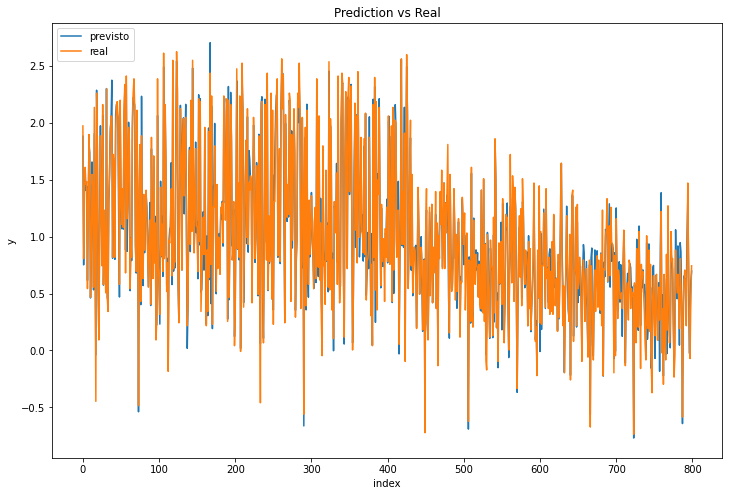

In [38]:
#Real vs. Previsto
mlp.plot_example(X_train_enc, y_train_enc, 0, 800)

In [39]:
mlp.evaluate(scaler_y, X_train_enc, y_train_enc, X_val_enc, y_val_enc, X_test_enc, y_test_enc)

Train ---> RMSE: 0.9703627056233722
Validation ---> RMSE: 1.1722764262444287
Test ---> RMSE: 1.4711007803551344


### Salva modelo

In [42]:
mlp.save('../trained_models/v4/MLP_64_16_Adam_1e3.pt')

Saved as ../trained_models/MLP_64_16_Adam_1e3.pt!


### CNN

In [ ]:
input_size = X_train_enc.shape[1]
h1, h2 = 64, 16
n_conv = 16
kernel_size = 3
model_cnn = CNN(input_size, n_conv, kernel_size, h1, h2)

model_cnn

In [ ]:
cnn = UsefullModel(model_cnn)

In [ ]:
cnn.fit('runs/mestrado/v4/CNN_16C_64_16_Adam_1e3', 
        X_train = X_train_enc, 
        y_train = y_train_enc, 
        X_val = X_val_enc, 
        y_val = y_val_enc, 
        epochs = 10000,
        optim = optim.Adam, 
        loss_function = nn.MSELoss())

In [ ]:
#Real vs. Previsto
cnn.plot_example(X_train_enc, y_train_enc, 0, 800)

In [ ]:
cnn.evaluate(scaler_y, X_train_enc, y_train_enc, X_val_enc, y_val_enc, X_test_enc, y_test_enc)

In [41]:
#mlp.load('teste_teste.pt')

### Extraindo para analisar labels

In [43]:
y_pred = mlp.predict(X_test_enc)
y_pred = scaler_y.inverse_transform(y_pred)

comparacao_test = pd.DataFrame(y_pred, columns=['prediction'])

_y_test = y_test.reset_index(drop=True)
comparacao_test['label'] = _y_test

X_test.reset_index(drop=True, inplace=True)

X_test['label'] = comparacao_test['label']
X_test['prediction'] = comparacao_test['prediction']

X_test

,lat,long,month,day,hour,forecast,gridpp,label,prediction
0,59.2173,10.4103,9,18,12,15.777100,15.35254,16.0,15.008988
1,59.7310,10.2142,7,16,12,21.154300,21.37570,21.5,20.618235
2,62.2943,8.1255,1,31,0,-6.549620,-4.38705,-4.2,-4.054106
3,59.5310,10.2643,4,7,6,1.531000,1.50204,4.3,1.475455
4,61.5832,5.0278,2,20,0,4.130600,4.55000,4.4,4.475904
...,...,...,...,...,...,...,...,...,...
84386,60.8548,8.5930,1,23,0,-9.725520,-9.36844,-10.6,-9.638906
84387,69.6767,18.9133,6,4,6,10.546880,8.75000,8.6,8.430120
84388,60.5878,11.1470,10,5,18,3.680908,1.71164,0.4,0.663525
84389,60.8935,7.0557,3,26,6,-4.182740,-0.81143,-0.4,-0.627813


In [44]:
X_test.to_csv('../data/predict/prediction_mlp_to_look.csv', index=False)

### Análise pos-processamento

In [42]:
df.head()

,lat,long,month,day,hour,forecast,gridpp,observation
0,59.9423,10.7200,5,13,12,12.47900,11.2500,11.1
1,66.9035,13.6460,5,13,12,4.09424,6.1500,6.0
2,62.2583,8.2000,5,13,12,1.81200,4.4500,4.3
3,61.4255,11.0803,5,13,12,8.86768,9.6500,9.5
4,61.1220,9.0630,5,13,12,7.61084,9.6586,8.6


In [43]:
X.head()

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.7200,5,13,12,12.47900,11.2500
1,66.9035,13.6460,5,13,12,4.09424,6.1500
2,62.2583,8.2000,5,13,12,1.81200,4.4500
3,61.4255,11.0803,5,13,12,8.86768,9.6500
4,61.1220,9.0630,5,13,12,7.61084,9.6586


In [44]:
teste = X.iloc[0][:]

In [55]:
type(y[0])

numpy.float64

In [46]:
teste

lat         59.9423
long          10.72
month             5
day              13
hour             12
forecast     12.479
gridpp        11.25
Name: 0, dtype: object

In [47]:
teste.to_numpy()

array([59.9423, 10.72, 5, 13, 12, 12.478999999999983, 11.25], dtype=object)

In [48]:
teste.to_list()

[59.9423, 10.72, 5, 13, 12, 12.478999999999983, 11.25]

In [49]:
pd.DataFrame(teste.to_numpy().reshape(1,-1), columns=X.columns)

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.72,5,13,12,12.479,11.25


In [50]:
X_train

,lat,long,month,day,hour,forecast,gridpp
332553,59.1895,5.1837,10,27,6,7.396480,5.96063
171409,64.1587,12.4692,7,3,18,5.749760,5.81186
663594,61.4582,10.1872,2,7,12,-5.336120,-10.65000
178261,71.0330,27.8298,8,31,12,16.599370,13.25000
305658,60.7022,6.9373,9,7,6,3.744870,5.69266
...,...,...,...,...,...,...,...
259178,62.5082,6.0762,9,26,18,11.987550,12.59985
366458,60.8562,5.9733,10,11,0,4.137207,6.35000
131932,59.8558,10.4358,7,19,18,16.840580,18.39590
671775,65.1103,6.7912,2,4,6,3.232500,2.99136


In [51]:
d = {
    'lat': [59.9423],
    'long': [10.7200],
    'month': [5],
    'day': [13],
    'hour': [12],
    'forecast': [12.49],
    'gridpp': [11.25]
}

In [52]:
d

{'lat': [59.9423],
 'long': [10.72],
 'month': [5],
 'day': [13],
 'hour': [12],
 'forecast': [12.49],
 'gridpp': [11.25]}

In [53]:
pd.DataFrame(d)

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.72,5,13,12,12.49,11.25


In [54]:
to_test = pd.DataFrame(d)
to_test

,lat,long,month,day,hour,forecast,gridpp
0,59.9423,10.72,5,13,12,12.49,11.25


In [60]:
def set_types(df):
    df = df.astype({'month': 'object'})
    df = df.astype({'day': 'object'})
    df = df.astype({'hour': 'object'})

    return df

In [61]:
to_test = set_types(to_test)
to_test.dtypes

lat         float64
long        float64
month        object
day          object
hour         object
forecast    float64
gridpp      float64
dtype: object

In [66]:
_x, _y, _, _, _ = prepare_data(to_test, pd.Series(11), encoder, scaler, scaler_y)

In [67]:
_x

array([[-0.68935078,  0.03367807,  0.97259308,  0.74305766,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [68]:
_y

array([[0.75413472]])

In [70]:
_pred = mlp.predict(_x)

In [71]:
scaler_y.inverse_transform(_y)

array([[11.]])

In [84]:
_pred

array([[0.70605177]], dtype=float32)

In [72]:
scaler_y.inverse_transform(_pred)

array([[10.614629]], dtype=float32)

In [89]:
def unit_test(model, lat, long, month, day, hour, forecast, gridpp, encoder, scaler):
    d = {
        'lat': [lat],
        'long': [long],
        'month': [month],
        'day': [day],
        'hour': [hour],
        'forecast': [forecast],
        'gridpp': [gridpp]
    }

    df = pd.DataFrame(d)


    df = set_types(df)
    print(df)

    _x, _, _, _, _ = prepare_data(df, pd.Series(11), encoder, scaler, scaler_y)

    return model.predict(_x)

In [90]:
unit_test(mlp, 60.0, 10.0, 5, 13, 12, 12.5, 11.25, encoder, scaler)

    lat  long month day hour  forecast  gridpp
0  60.0  10.0     5  13   12      12.5   11.25


array([[0.7168124]], dtype=float32)